In [1]:
%reload_ext autoreload
%autoreload 2

from glob import glob
import numpy as np
import scipy
from scipy.interpolate import CubicSpline
#from scipy import integrate
import matplotlib.pyplot as plt
import sys
sys.path.append("../../../../dqmc_edit/thermaltest/Determinant-QMC/util/")
import util
import maxent
import matplotlib.ticker as ticker
plt.rcParams["figure.facecolor"] = 'w'
plt.rcParams.update({'font.size': 16, 'font.sans-serif':'Liberation Sans'})

from IPython.display import display_html
display_html("""<button onclick="$('.input, .output_stderr, .output_error').toggle();">Toggle Code</button>""", raw=True)

Toggle Code

In [2]:
def loading(U,tp,sitex,sitey,prefix):
    jeje = np.load("../calculation/"+prefix+f"jejeU{U:g}tp{tp:g}_{sitex:g}*{sitey:g}.npy")
    jkjk = np.load("../calculation/"+prefix+f"jkjkU{U:g}tp{tp:g}_{sitex:g}*{sitey:g}.npy")
    jpjp = np.load("../calculation/"+prefix+f"jpjpU{U:g}tp{tp:g}_{sitex:g}*{sitey:g}.npy")
    j0j0 = np.load("../calculation/"+prefix+f"j0j0U{U:g}tp{tp:g}_{sitex:g}*{sitey:g}.npy")
    C = np.load("../calculation/"+prefix+f"CU{U:g}tp{tp:g}_{sitex:g}*{sitey:g}.npy")
    chi = np.load("../calculation/"+prefix+f"chiU{U:g}tp{tp:g}_{sitex:g}*{sitey:g}.npy")
    
    jejes = np.load("../calculation/"+prefix+f"jejesU{U:g}tp{tp:g}_{sitex:g}*{sitey:g}.npy")
    jkjks = np.load("../calculation/"+prefix+f"jkjksU{U:g}tp{tp:g}_{sitex:g}*{sitey:g}.npy")
    jpjps = np.load("../calculation/"+prefix+f"jpjpsU{U:g}tp{tp:g}_{sitex:g}*{sitey:g}.npy")
    j0j0s = np.load("../calculation/"+prefix+f"j0j0sU{U:g}tp{tp:g}_{sitex:g}*{sitey:g}.npy")
    Cs = np.load("../calculation/"+prefix+f"CsU{U:g}tp{tp:g}_{sitex:g}*{sitey:g}.npy")
    chis = np.load("../calculation/"+prefix+f"chisU{U:g}tp{tp:g}_{sitex:g}*{sitey:g}.npy")
    
    
    return jeje ,jkjk,jpjp,j0j0,C,chi,jejes,jkjks,jpjps,j0j0s,Cs,chis


def calc(betas,U,tp,sitex,sitey,prefix = "transport_"):
    w = np.load(f"../calculation/wU={U:g}.npy")
    Ajeje ,Ajkjk,Ajpjp,Aj0j0,C,chi,jejes,jkjks,jpjps,j0j0s,Cs,chis = \
    loading(U,tp,sitex,sitey,prefix)
    

    kappas = np.zeros((len(betas),2))

    kappa1s = np.zeros((len(betas),2))

    kappa2s = np.zeros((len(betas),2))
    
    kappa_couple = np.zeros((len(betas),2))

    for j,beta in enumerate(betas[:]):
        jeje ,jkjk,jpjp,j0j0, = \
        jejes[0,j] ,jkjks[0,j],jpjps[0,j],j0j0s[0,j],


        ks =( jeje[:,0])*beta
        kappas[ j,1] = np.std(ks[:],ddof = 1)

        kappa1sspart1 = ( jkjk[:,0])*beta
        kappa2sspart1  = ( jpjp[:,0])*beta

        part2 = (ks-kappa1sspart1-kappa2sspart1)/2

        kappa1s[ j,1] = np.std(kappa1sspart1,ddof = 1)
        kappa2s[ j,1] = np.std(kappa2sspart1,ddof = 1)
        
        kappa_couple[j,1] = np.std(part2,ddof = 1)
#########################################

        jeje ,jkjk,jpjp,j0j0 = \
        Ajeje[0,j],Ajkjk[0,j],Ajpjp[0,j],Aj0j0[0,j]

        kappas[ j,0] =  (jeje[0])*beta

        kappa1spart1 = ( jkjk[0]) *beta
        kappa2spart1 = ( jpjp[0]) *beta

        kappa1s[ j,0] = kappa1spart1
        kappa2s[ j,0] = kappa2spart1
        kappa_couple[j,0] = (jeje[0] - jkjk[0] - jpjp[0])/2*beta
            
    return kappas,kappa1s,kappa2s,kappa_couple


In [3]:
prefix = "n1_annealing_single_alwaysBT"

sitex=8
sitey=8


U=8
tp = 0
betasU8 = np.array([0.125,0.25,0.3,0.4,0.5,0.6,0.7,1,1.5,2,2.5,3,3.5,4,4.5,5,5.5,6,7,8,10,12,20])

kappasU8,kappa1sU8,kappa2sU8,kappa_coupleU8= calc(betasU8,U,tp,sitex,sitey,prefix =prefix)

prefix = "n1_annealing_single_alwaysBT"
U=10
tp = 0
betasU10 = np.array([0.125,0.25,0.3,0.4,0.5,0.6,0.7,1,1.5,2,2.5,3,3.5,4,4.5,5,6,7,8,10,12,20])

kappasU10,kappa1sU10,kappa2sU10,kappa_coupleU10= calc(betasU10,U,tp,sitex,sitey,prefix =prefix)


U=12
tp = 0
betasU12 =np.array([0.125,0.25,0.3,0.4,0.5,0.6,0.7,1,1.5,2,2.5,3,3.5,4,4.5,5,6,7,8,10,12])

kappasU12,kappa1sU12,kappa2sU12,kappa_coupleU12= calc(betasU12,U,tp,sitex,sitey,prefix =prefix)




In [4]:
prefix = "n1_annealing_single_alwaysBT"
sitex = 4
sitey = 4


U=8
tp = 0
betasU8_44 = np.array([2,2.5,3,3.5,4,4.5,5,6,7,8,10])

kappasU8_44,kappa1sU8_44,kappa2sU8_44,kappa_coupleU8_44= calc(betasU8_44,U,tp,sitex,sitey,prefix =prefix)


prefix = "n1_annealing_single_alwaysBT"
sitex = 10
sitey = 10


U=8
tp = 0
betasU8_1010 = np.array([2,2.5,3,3.5,4,4.5,5,5.5,6,7,8,10])

kappasU8_1010,kappa1sU8_1010,kappa2sU8_1010,kappa_coupleU8_1010= calc(betasU8_1010,U,tp,sitex,sitey,prefix =prefix)


prefix = "n1_annealing_single_alwaysBT"
sitex = 6
sitey = 6


U=8
tp = 0
betasU8_66 = np.array([2,2.5,3,3.5,4,4.5,5,5.5,6,7,8])

kappasU8_66,kappa1sU8_66,kappa2sU8_66,kappa_coupleU8_66= calc(betasU8_66,U,tp,sitex,sitey,prefix =prefix)



prefix = "n1_annealing_single_alwaysBT"
sitex = 4
sitey = 4


U=12
tp = 0
betasU12_44 = np.array([2,2.5,3,3.5,4,4.5,5,6,7,8])


kappasU12_44,kappa1sU12_44,kappa2sU12_44,kappa_coupleU12_44= calc(betasU12_44,U,tp,sitex,sitey,prefix =prefix)

prefix = "dt05_n1_annealing_single_alwaysBT"
sitex = 6
sitey = 6


U=10
tp = 0
betasU10_66 = np.array([2,2.5,3,3.5,4,4.5,5,6,7,8])

kappasU10_66,kappa1sU10_66,kappa2sU10_66,kappa_coupleU10_66= calc(betasU10_66, U,tp,sitex,sitey,prefix =prefix)


prefix ='n1_annealing_single_alwaysBT'

U=12
sitex=6
sitey=6
tp = 0
betasU12_66 =np.array([2,2.5,3,3.5,4,4.5,5,6,7,8,])

kappasU12_66,kappa1sU12_66,kappa2sU12_66,kappa_coupleU12_66= calc(betasU12_66,U,tp,sitex,sitey,prefix =prefix)

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


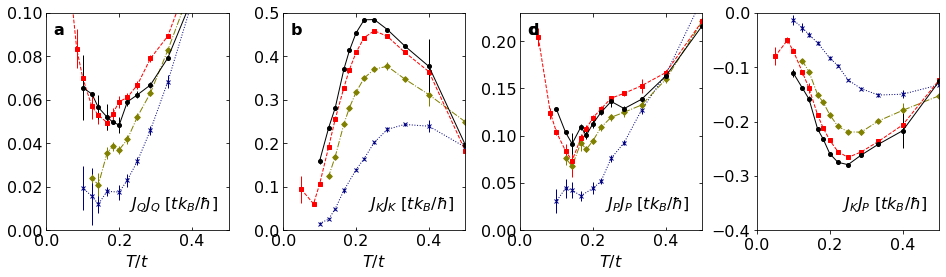

In [5]:
U=8
sitex = 8
sitey = 8
tp = 0


dt='05'

cmap = plt.cm.coolwarm
colorlist=['navy','olive','r','k']
symbols = ['x','D','s','o']
f, axs = plt.subplots(1,4, sharex=True, sharey=False, figsize=(16,4))

axs[0].tick_params(direction='in',bottom=True, top=True, left=True, right=True)
axs[1].tick_params(direction='in',bottom=True, top=True, left=True, right=True)
axs[2].tick_params(direction='in',bottom=True, top=True, left=True, right=True)

plt.subplots_adjust(wspace=0.3, hspace=0.07)
z0U8=None
zU8=None
axs[0].set_xlabel(r"$T/t$")
axs[1].set_xlabel(r"$T/t$")
axs[2].set_xlabel(r"$T/t$")


axs[0].errorbar(1/betasU8_44[z0U8:zU8],kappasU8_44[z0U8:zU8,0],kappasU8_44[z0U8:zU8,1],lw=1, 
                  ms=4,color=colorlist[0],marker=symbols[0], linestyle='dotted'
           )


axs[1].errorbar(1/betasU8_44[z0U8:zU8],kappa1sU8_44[z0U8:zU8,0],kappa1sU8_44[z0U8:zU8,1],lw=1, 
                  ms=4,color=colorlist[0],marker=symbols[0], linestyle='dotted'
           )


axs[2].errorbar(1/betasU8_44[z0U8:zU8],kappa2sU8_44[z0U8:zU8,0],kappa2sU8_44[z0U8:zU8,1],lw=1, 
                  ms=4,color=colorlist[0],marker=symbols[0], linestyle='dotted'
           )
axs[3].errorbar(1/betasU8_44[z0U8:zU8],kappa_coupleU8_44[z0U8:zU8,0],kappa_coupleU8_44[z0U8:zU8,1],lw=1, 
                  ms=4,color=colorlist[0],marker=symbols[0], linestyle='dotted'
           )


axs[0].errorbar(1/betasU8_66[z0U8:zU8],kappasU8_66[z0U8:zU8,0],kappasU8_66[z0U8:zU8,1],lw=1, 
                  ms=4,color=colorlist[1],marker=symbols[1], linestyle='-.'
           )


axs[1].errorbar(1/betasU8_66[z0U8:zU8],kappa1sU8_66[z0U8:zU8,0],kappa1sU8_66[z0U8:zU8,1],lw=1, 
                  ms=4,color=colorlist[1],marker=symbols[1], linestyle='-.'
           )


axs[2].errorbar(1/betasU8_66[z0U8:zU8],kappa2sU8_66[z0U8:zU8,0],kappa2sU8_66[z0U8:zU8,1],lw=1, 
                  ms=4,color=colorlist[1],marker=symbols[1], linestyle='-.'
           )

axs[3].errorbar(1/betasU8_66[z0U8:zU8],kappa_coupleU8_66[z0U8:zU8,0],kappa_coupleU8_66[z0U8:zU8,1],lw=1, 
                  ms=4,color=colorlist[1],marker=symbols[1], linestyle='-.'
           )



axs[0].errorbar(1/betasU8[z0U8:zU8],kappasU8[z0U8:zU8,0],kappasU8[z0U8:zU8,1],lw=1, 
                  ms=4,color=colorlist[2],marker=symbols[2], linestyle='dashed'
           )


axs[1].errorbar(1/betasU8[z0U8:zU8],kappa1sU8[z0U8:zU8,0],kappa1sU8[z0U8:zU8,1],lw=1, 
                  ms=4,color=colorlist[2],marker=symbols[2], linestyle='dashed'
           )


axs[2].errorbar(1/betasU8[z0U8:zU8],kappa2sU8[z0U8:zU8,0],kappa2sU8[z0U8:zU8,1],lw=1, 
                  ms=4,color=colorlist[2],marker=symbols[2], linestyle='dashed'
           )

axs[3].errorbar(1/betasU8[z0U8:zU8],kappa_coupleU8[z0U8:zU8,0],kappa_coupleU8[z0U8:zU8,1],lw=1, 
                  ms=4,color=colorlist[2],marker=symbols[2], linestyle='dashed'
           )




axs[0].errorbar(1/betasU8_1010[z0U8:zU8],kappasU8_1010[z0U8:zU8,0],kappasU8_1010[z0U8:zU8,1],lw=1, 
                  ms=4,color=colorlist[3],marker=symbols[3], linestyle='solid'
           )


axs[1].errorbar(1/betasU8_1010[z0U8:zU8],kappa1sU8_1010[z0U8:zU8,0],kappa1sU8_1010[z0U8:zU8,1],lw=1, 
                  ms=4,color=colorlist[3],marker=symbols[3], linestyle='solid'
           )


axs[2].errorbar(1/betasU8_1010[z0U8:zU8],kappa2sU8_1010[z0U8:zU8,0],kappa2sU8_1010[z0U8:zU8,1],lw=1, 
                  ms=4,color=colorlist[3],marker=symbols[3], linestyle='solid'
           )

axs[3].errorbar(1/betasU8_1010[z0U8:zU8],kappa_coupleU8_1010[z0U8:zU8,0],kappa_coupleU8_1010[z0U8:zU8,1],lw=1, 
                  ms=4,color=colorlist[3],marker=symbols[3], linestyle='solid'
           )



handles, labels = axs[0].get_legend_handles_labels()
axs[0].legend(handles[::-1], labels[::-1],frameon=False,labelspacing=0.1,fontsize=16,loc='lower right')   


axs[0].set_xlim(0,0.5)
axs[0].set_ylim(0,0.1)
axs[1].set_ylim(0,0.5)
axs[2].set_ylim(0,0.23)
axs[3].set_ylim(-0.4,0)

axs[0].text(0.7,0.1,r"$J_QJ_Q$ [$tk_B/\hbar$]", size=16, horizontalalignment='center',transform=axs[0].transAxes)
axs[1].text(0.7,0.1,r"$J_KJ_K$ [$tk_B/\hbar$]", size=16, horizontalalignment='center',transform=axs[1].transAxes)
axs[2].text(0.7,0.1,r"$J_PJ_P$ [$tk_B/\hbar$]", size=16, horizontalalignment='center',transform=axs[2].transAxes)
axs[3].text(0.7,0.1,r"$J_KJ_P$ [$tk_B/\hbar$]", size=16, horizontalalignment='center',transform=axs[3].transAxes)


axs[0].text(0.07,0.9,"a", size=16, weight='bold',horizontalalignment='center',transform=axs[0].transAxes)
axs[1].text(0.07,0.9,"b", size=16, weight='bold',horizontalalignment='center',transform=axs[1].transAxes)
axs[2].text(0.07,0.9,"c", size=16, weight='bold',horizontalalignment='center',transform=axs[2].transAxes)
axs[3].text(0.07,0.9,"d", size=16, weight='bold',horizontalalignment='center',transform=axs[2].transAxes)



plt.show()

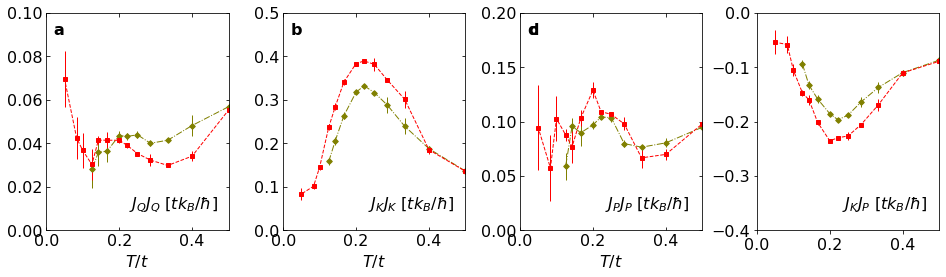

In [6]:
U=10
sitex = 8
sitey = 8
tp = 0


dt='05'

cmap = plt.cm.coolwarm
colorlist=['navy','olive','r','k']
symbols = ['x','D','s','o']
f, axs = plt.subplots(1,4, sharex=True, sharey=False, figsize=(16,4))

axs[0].tick_params(direction='in',bottom=True, top=True, left=True, right=True)
axs[1].tick_params(direction='in',bottom=True, top=True, left=True, right=True)
axs[2].tick_params(direction='in',bottom=True, top=True, left=True, right=True)

plt.subplots_adjust(wspace=0.3, hspace=0.07)
z0U10=None
zU10=None
axs[0].set_xlabel(r"$T/t$")
axs[1].set_xlabel(r"$T/t$")
axs[2].set_xlabel(r"$T/t$")




axs[0].errorbar(1/betasU10_66[z0U10:zU10],kappasU10_66[z0U10:zU10,0],kappasU10_66[z0U10:zU10,1],lw=1, 
                  ms=4,color=colorlist[1],marker=symbols[1], linestyle='-.'
           )


axs[1].errorbar(1/betasU10_66[z0U10:zU10],kappa1sU10_66[z0U10:zU10,0],kappa1sU10_66[z0U10:zU10,1],lw=1, 
                  ms=4,color=colorlist[1],marker=symbols[1], linestyle='-.'
           )


axs[2].errorbar(1/betasU10_66[z0U10:zU10],kappa2sU10_66[z0U10:zU10,0],kappa2sU10_66[z0U10:zU10,1],lw=1, 
                  ms=4,color=colorlist[1],marker=symbols[1], linestyle='-.'
           )

axs[3].errorbar(1/betasU10_66[z0U10:zU10],kappa_coupleU10_66[z0U10:zU10,0],kappa_coupleU10_66[z0U10:zU10,1],lw=1, 
                  ms=4,color=colorlist[1],marker=symbols[1], linestyle='-.'
           )



axs[0].errorbar(1/betasU10[z0U10:zU10],kappasU10[z0U10:zU10,0],kappasU10[z0U10:zU10,1],lw=1, 
                  ms=4,color=colorlist[2],marker=symbols[2], linestyle='dashed'
           )


axs[1].errorbar(1/betasU10[z0U10:zU10],kappa1sU10[z0U10:zU10,0],kappa1sU10[z0U10:zU10,1],lw=1, 
                  ms=4,color=colorlist[2],marker=symbols[2], linestyle='dashed'
           )


axs[2].errorbar(1/betasU10[z0U10:zU10],kappa2sU10[z0U10:zU10,0],kappa2sU10[z0U10:zU10,1],lw=1, 
                  ms=4,color=colorlist[2],marker=symbols[2], linestyle='dashed'
           )

axs[3].errorbar(1/betasU10[z0U10:zU10],kappa_coupleU10[z0U10:zU10,0],kappa_coupleU10[z0U10:zU10,1],lw=1, 
                  ms=4,color=colorlist[2],marker=symbols[2], linestyle='dashed'
           )



handles, labels = axs[0].get_legend_handles_labels()
axs[0].legend(handles[::-1], labels[::-1],frameon=False,labelspacing=0.1,fontsize=16,loc='lower right')   


axs[0].set_xlim(0,0.5)
axs[0].set_ylim(0,0.1)
axs[1].set_ylim(0,0.5)
axs[2].set_ylim(0,0.2)
axs[3].set_ylim(-0.4,0)

axs[0].text(0.7,0.1,r"$J_QJ_Q$ [$tk_B/\hbar$]", size=16, horizontalalignment='center',transform=axs[0].transAxes)
axs[1].text(0.7,0.1,r"$J_KJ_K$ [$tk_B/\hbar$]", size=16, horizontalalignment='center',transform=axs[1].transAxes)
axs[2].text(0.7,0.1,r"$J_PJ_P$ [$tk_B/\hbar$]", size=16, horizontalalignment='center',transform=axs[2].transAxes)
axs[3].text(0.7,0.1,r"$J_KJ_P$ [$tk_B/\hbar$]", size=16, horizontalalignment='center',transform=axs[3].transAxes)


axs[0].text(0.07,0.9,"a", size=16, weight='bold',horizontalalignment='center',transform=axs[0].transAxes)
axs[1].text(0.07,0.9,"b", size=16, weight='bold',horizontalalignment='center',transform=axs[1].transAxes)
axs[2].text(0.07,0.9,"c", size=16, weight='bold',horizontalalignment='center',transform=axs[2].transAxes)
axs[3].text(0.07,0.9,"d", size=16, weight='bold',horizontalalignment='center',transform=axs[2].transAxes)



plt.show()

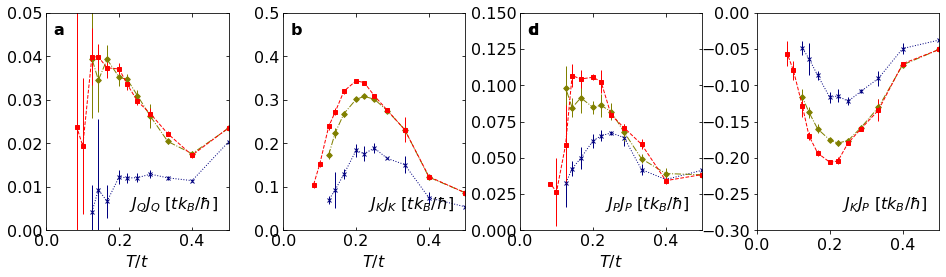

In [7]:
U=12
sitex = 8
sitey = 8
tp = 0


dt='05'

cmap = plt.cm.coolwarm
colorlist=['navy','olive','r','k']
symbols = ['x','D','s','o']
f, axs = plt.subplots(1,4, sharex=True, sharey=False, figsize=(16,4))

axs[0].tick_params(direction='in',bottom=True, top=True, left=True, right=True)
axs[1].tick_params(direction='in',bottom=True, top=True, left=True, right=True)
axs[2].tick_params(direction='in',bottom=True, top=True, left=True, right=True)

plt.subplots_adjust(wspace=0.3, hspace=0.07)
z0U12=None
zU12=None
axs[0].set_xlabel(r"$T/t$")
axs[1].set_xlabel(r"$T/t$")
axs[2].set_xlabel(r"$T/t$")


axs[0].errorbar(1/betasU12_44[z0U12:zU12],kappasU12_44[z0U12:zU12,0],kappasU12_44[z0U12:zU12,1],lw=1, 
                  ms=4,color=colorlist[0],marker=symbols[0], linestyle='dotted'
           )


axs[1].errorbar(1/betasU12_44[z0U12:zU12],kappa1sU12_44[z0U12:zU12,0],kappa1sU12_44[z0U12:zU12,1],lw=1, 
                  ms=4,color=colorlist[0],marker=symbols[0], linestyle='dotted'
           )


axs[2].errorbar(1/betasU12_44[z0U12:zU12],kappa2sU12_44[z0U12:zU12,0],kappa2sU12_44[z0U12:zU12,1],lw=1, 
                  ms=4,color=colorlist[0],marker=symbols[0], linestyle='dotted'
           )
axs[3].errorbar(1/betasU12_44[z0U12:zU12],kappa_coupleU12_44[z0U12:zU12,0],kappa_coupleU12_44[z0U12:zU12,1],lw=1, 
                  ms=4,color=colorlist[0],marker=symbols[0], linestyle='dotted'
           )


axs[0].errorbar(1/betasU12_66[z0U12:zU12],kappasU12_66[z0U12:zU12,0],kappasU12_66[z0U12:zU12,1],lw=1, 
                  ms=4,color=colorlist[1],marker=symbols[1], linestyle='-.'
           )


axs[1].errorbar(1/betasU12_66[z0U12:zU12],kappa1sU12_66[z0U12:zU12,0],kappa1sU12_66[z0U12:zU12,1],lw=1, 
                  ms=4,color=colorlist[1],marker=symbols[1], linestyle='-.'
           )


axs[2].errorbar(1/betasU12_66[z0U12:zU12],kappa2sU12_66[z0U12:zU12,0],kappa2sU12_66[z0U12:zU12,1],lw=1, 
                  ms=4,color=colorlist[1],marker=symbols[1], linestyle='-.'
           )

axs[3].errorbar(1/betasU12_66[z0U12:zU12],kappa_coupleU12_66[z0U12:zU12,0],kappa_coupleU12_66[z0U12:zU12,1],lw=1, 
                  ms=4,color=colorlist[1],marker=symbols[1], linestyle='-.'
           )



axs[0].errorbar(1/betasU12[z0U12:zU12],kappasU12[z0U12:zU12,0],kappasU12[z0U12:zU12,1],lw=1, 
                  ms=4,color=colorlist[2],marker=symbols[2], linestyle='dashed'
           )


axs[1].errorbar(1/betasU12[z0U12:zU12],kappa1sU12[z0U12:zU12,0],kappa1sU12[z0U12:zU12,1],lw=1, 
                  ms=4,color=colorlist[2],marker=symbols[2], linestyle='dashed'
           )


axs[2].errorbar(1/betasU12[z0U12:zU12],kappa2sU12[z0U12:zU12,0],kappa2sU12[z0U12:zU12,1],lw=1, 
                  ms=4,color=colorlist[2],marker=symbols[2], linestyle='dashed'
           )

axs[3].errorbar(1/betasU12[z0U12:zU12],kappa_coupleU12[z0U12:zU12,0],kappa_coupleU12[z0U12:zU12,1],lw=1, 
                  ms=4,color=colorlist[2],marker=symbols[2], linestyle='dashed'
           )





handles, labels = axs[0].get_legend_handles_labels()
axs[0].legend(handles[::-1], labels[::-1],frameon=False,labelspacing=0.1,fontsize=16,loc='lower right')   


axs[0].set_xlim(0,0.5)
axs[0].set_ylim(0,0.05)
axs[1].set_ylim(0,0.5)
axs[2].set_ylim(0,0.15)
axs[3].set_ylim(-0.3,0)

axs[0].text(0.7,0.1,r"$J_QJ_Q$ [$tk_B/\hbar$]", size=16, horizontalalignment='center',transform=axs[0].transAxes)
axs[1].text(0.7,0.1,r"$J_KJ_K$ [$tk_B/\hbar$]", size=16, horizontalalignment='center',transform=axs[1].transAxes)
axs[2].text(0.7,0.1,r"$J_PJ_P$ [$tk_B/\hbar$]", size=16, horizontalalignment='center',transform=axs[2].transAxes)
axs[3].text(0.7,0.1,r"$J_KJ_P$ [$tk_B/\hbar$]", size=16, horizontalalignment='center',transform=axs[3].transAxes)


axs[0].text(0.07,0.9,"a", size=16, weight='bold',horizontalalignment='center',transform=axs[0].transAxes)
axs[1].text(0.07,0.9,"b", size=16, weight='bold',horizontalalignment='center',transform=axs[1].transAxes)
axs[2].text(0.07,0.9,"c", size=16, weight='bold',horizontalalignment='center',transform=axs[2].transAxes)
axs[3].text(0.07,0.9,"d", size=16, weight='bold',horizontalalignment='center',transform=axs[2].transAxes)



plt.show()